In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
#55 essential genes
genes = ['RPS14', 'CDC5L', 'POLR2I', 'RPS7', 'XAB2', 'RPS19BP1', 'RPL23A', 'SUPT6H', 'PRPF31', 'U2AF1', 'PSMD7',
         'Hsp10', 'RPS13', 'PHB', 'RPS9', 'EIF5B', 'RPS6', 'RPS11', 'SUPT5H', 'SNRPD2', 'RPL37', 'RPSA', 'COPS6',
         'DDX51', 'EIF4A3', 'KARS', 'RPL5', 'RPL32', 'SF3A1', 'RPS3A', 'SF3B3', 'POLR2D', 'RPS15A', 'RPL31', 'PRPF19',
         'SF3B2', 'RPS4X', 'CSE1L', 'RPL6', 'COPZ1', 'PSMB2', 'RPL7', 'PHB2', 'ARCN1', 'RPA2', 'NUP98', 'RPS3', 'EEF2',
         'USP39', 'PSMD1', 'NUP93', 'AQR', 'RPL34', 'PSMA1', 'RPS27A']

In [3]:
#raw count data, essential genes
df = pd.read_csv('../data/d14_plasmid_library_ratio_targeting_library.csv',header=None)
df.columns =['guide','gene name', 'gene_id', 'pos', 'raw ratio'] 

#targeting controls, unfiltered
control_genes = ['CTCFL', 'SAGE1', 'TLX1', 'DTX2', 'OR2C3']
df_tc = pd.read_excel('../data/d14_plasmid_library_ratio_control_guides.xlsx', sheet_name='d14_plasmid_library_ratio_contr',header=None, 
                      names = ['guide','gene','refseq_id','pos','raw ratio','10pct','20pct'])
                      
#nt guides
df_nt = pd.read_csv('../data/d14_plasmid_library_ratio_deduped_nontargeting_guides.csv',header=None,
                   names=['guide','x','id','xx','raw ratio'])

In [4]:
print(np.percentile(df['raw ratio'], 20))

0.45


In [3]:
#merge with features and off targets
df_offtarget = pd.read_csv('guide_feature_offtarget_first24_e1_20.csv')
df_all = df_offtarget.merge(df, left_on='guide', right_on='guide')

FileNotFoundError: [Errno 2] No such file or directory: 'guide_feature_offtarget_first24_e1_20.csv'

In [21]:
#filtered, start here
df_all_iso = pd.read_csv('integrated_guide_feature_filtered_f24_mismatch3_rnafe.csv')
print(len(df_all_iso))
print(np.percentile(df_all_iso['raw ratio'], 20))

len(df_all_iso[df_all_iso['raw ratio']<0.48]['guide'].values)

len(df_all_iso[(df_all_iso['raw ratio']<0.48) & (df_all_iso['raw ratio']>=0.45)]['raw ratio'].values)

822

## plot and calculate ratio percentile

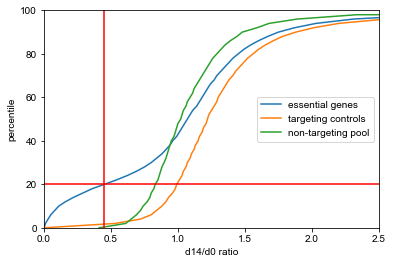

In [17]:
#overall plot
plt.clf()
plt.rcParams['svg.fonttype'] = 'none'
# change font
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

p = np.linspace(0, 100, 51)
plt.figsize=(20,30)
ax = plt.gca()

#essential genes, pooled
#ax.plot(np.percentile(df_essential['raw ratio'], p),p, label = 'essential genes')
ax.plot(np.percentile(df['raw ratio'], p),p, label = 'essential genes')

#targeting controls,pooled
ax.plot(np.percentile(df_tc['raw ratio'], p),p, label = 'targeting controls')

#nt guides
ax.plot(np.percentile(df_nt['raw ratio'], p),p, label = 'non-targeting pool')

ax.set(
    xlabel='d14/d0 ratio',
    ylabel='percentile')
ax.legend(bbox_to_anchor=(1.4, 0.8))
#plt.vlines(x=0.75)
ax.axvline(x=0.45,c='red')
ax.axhline(y=20,c='red')
ax.legend()
#plt.xscale('log')
#plt.grid(True)
plt.xlim(0,2.5)
plt.ylim(0,100)
#plt.show()
plt.savefig('../a_figures/ratio_percentile_unfiltered.svg', format="svg", bbox_inches='tight')

In [5]:
#essential genes, pooled ratio analysis
df_essential = df
good_p_all1 = stats.percentileofscore(df_essential['raw ratio'], 0.41) #lowest ratio in nt guides
print('pct of lowest ratio in nt: '+str(good_p_all1))
good_p_all2 = stats.percentileofscore(df_essential['raw ratio'], 0.45)
print('pct of 0.45 ratio: '+str(good_p_all2))
good_p_all3 = stats.percentileofscore(df_essential['raw ratio'], 0.61) #2% nt
print("pct of 2% nt's ratio : "+str(good_p_all3))
good_p_all4 = stats.percentileofscore(df_essential['raw ratio'], 0.75) #10% nt
print("pct of 10% nt's ratio : "+str(good_p_all4))
bad_p1 = stats.percentileofscore(df_essential['raw ratio'], 2)
print('pct of 2 ratio: '+str(bad_p1))
bad_p2 = stats.percentileofscore(df_essential['raw ratio'], 2.5)
print('pct of 2.5 ratio: '+str(bad_p2))
pct_g = np.percentile(df_essential['raw ratio'],[10,20,80,90,95])
print('10th, 20th, 80th, 90th, 95th percentile ratio:')
print(pct_g)

#individual gene's ratio
gene_ratio = {}
for g in genes:
    df_g = df_essential[df_essential['gene name']==g]
    pct_g = np.percentile(df_g['raw ratio'],[5,10,20,50,80,90,95])    
    good_p1 = stats.percentileofscore(df_g['raw ratio'], 0.45)
    good_p2 = stats.percentileofscore(df_g['raw ratio'], 0.48)
    good_p3 = stats.percentileofscore(df_g['raw ratio'], 0.61)
    good_p4 = stats.percentileofscore(df_g['raw ratio'], 0.75)
    bad_p1 = stats.percentileofscore(df_g['raw ratio'], 2) # 2 ratio
    bad_p2 = stats.percentileofscore(df_g['raw ratio'], 2.5) #2.5ratio
    gene_ratio[g]= list(pct_g)+[good_p1,good_p2,good_p3,good_p4,bad_p1,bad_p2]
    
output_file = '../data/survival screen qc/ratio_by_gene_essential_unfiltered.csv'
with open(output_file,'w') as csvfile:
    mywriter = csv.writer(csvfile)
    mywriter.writerow(['gene','5pct','10pct','20pct','50pct','80pct','90pct','95pct',
                     '0.45ratio_pct','0.48ratio_pct','0.61ratio_pct','0.75ratio_pct','2ratio_pct','2.5ratio_pct'])
    for gene in gene_ratio.keys():
        mywriter.writerow([gene] + gene_ratio[gene])   

pct of lowest ratio in nt: 19.080671435654082
pct of 0.45 ratio: 20.049027708918636
pct of 2% nt's ratio : 23.794965019555995
pct of 10% nt's ratio : 27.964681162499705
pct of 2 ratio: 93.6531545356533
pct of 2.5 ratio: 96.85844921343187
10th, 20th, 80th, 90th, 95th percentile ratio:
[0.11 0.45 1.45 1.75 2.15]


In [6]:
#control genes, pooled ratio analysis
pct_g = np.percentile(df_tc['raw ratio'],[2,5,10,20])
print(pct_g)
good_p = stats.percentileofscore(df_tc['raw ratio'], 0.45)
print(good_p)
good_p2 = stats.percentileofscore(df_tc['raw ratio'], 0.75)
print(good_p2)
bad_p1 = stats.percentileofscore(df_tc['raw ratio'], 2)
print(bad_p1)
bad_p2 = stats.percentileofscore(df_tc['raw ratio'], 2.5)
print(bad_p2)

#individual gene's ratio
gene_ratio = {}
for g in control_genes:
    df_g = df_tc[df_tc['gene']==g]
    pct_g = np.percentile(df_g['raw ratio'],[5,10,20,50,80,90,95])    
    good_p1 = stats.percentileofscore(df_g['raw ratio'], 0.45)
    good_p2 = stats.percentileofscore(df_g['raw ratio'], 0.48)
    good_p3 = stats.percentileofscore(df_g['raw ratio'], 0.61)
    good_p4 = stats.percentileofscore(df_g['raw ratio'], 0.75)
    bad_p1 = stats.percentileofscore(df_g['raw ratio'], 2) # 2 ratio
    bad_p2 = stats.percentileofscore(df_g['raw ratio'], 2.5) # 2.5ratio
    gene_ratio[g]= list(pct_g)+[good_p1,good_p2,good_p3,good_p4,bad_p1,bad_p2]
    
output_file = '../data/survival screen qc/ratio_by_gene_controls_unfiltered.csv'
#output_file = '../data/survival screen qc/ratio_by_gene_controls_filtered.csv'
with open(output_file,'w') as csvfile:
    mywriter = csv.writer(csvfile)
    mywriter.writerow(['gene','5pct','10pct','20pct','50pct','80pct','90pct','95pct',
                     '0.45ratio_pct','0.48ratio_pct','0.61ratio_pct','0.75ratio_pct','2ratio_pct','2.5ratio_pct'])
    for gene in gene_ratio.keys():
        mywriter.writerow([gene] + gene_ratio[gene])  

[0.53 0.77 0.88 0.99]
1.6015874140741266
4.634682162851676
91.82198285025866
95.79051803557509


In [7]:
#nt guides
pct_g = np.percentile(df_nt['raw ratio'],[2,5,10,20,80,90,95])
print(pct_g)
good_p = stats.percentileofscore(df_nt['raw ratio'], 0.45)
print(good_p)
good_p2 = stats.percentileofscore(df_nt['raw ratio'], 0.48)
print(good_p2)
good_p3 = stats.percentileofscore(df_nt['raw ratio'], 0.75)
print(good_p3)
bad_p1 = stats.percentileofscore(df_nt['raw ratio'], 2)
print(bad_p1)
bad_p2 = stats.percentileofscore(df_nt['raw ratio'], 2.5)
print(bad_p2)

[0.61 0.68 0.74 0.83 1.29 1.48 1.75]
0.09823182711198428
0.29469548133595286
10.524838619141173
96.81448217793994
98.37215829357284


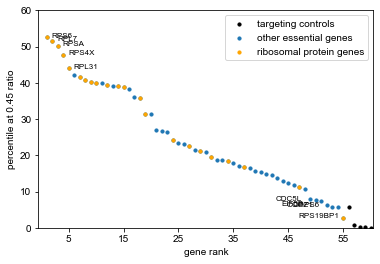

In [45]:
# individual gene plot
df_ess = pd.read_csv('../data/survival screen qc/ratio_by_gene_essential_unfiltered.csv')
df_ess = df_ess.sort_values(by=['0.45ratio_pct'])
df_c = pd.read_csv('../data/survival screen qc/ratio_by_gene_controls_unfiltered.csv')
df_c = df_c.sort_values(by=['0.45ratio_pct'])

plt.clf()
plt.rcParams['svg.fonttype'] = 'none'
# change font
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

plt.figsize=(20,30)
ax = plt.gca()

#df_ess.plot(x='gene', y='0.45ratio_pct', kind='scatter',ax=ax,label='essential genes',c='black')
df_c.plot(x='gene', y='0.45ratio_pct', kind='scatter',ax=ax,label='targeting controls',c='black',s=10)
df_ess.plot(x='gene', y='0.45ratio_pct', kind='scatter',ax=ax,label='other essential genes',s=10)
#df_ess.head(5)[['gene','0.45ratio_pct','gene']].apply(lambda row: ax.text(*row),axis=1)
for k, v in df_ess.head(5)[['gene','0.45ratio_pct']].iterrows():
    ax.annotate(v['gene'], v, xytext=(-45,0), textcoords='offset points',fontsize=8)
#df_ess.tail(5)[['gene','0.45ratio_pct','gene']].apply(lambda row: ax.text(*row),axis=1)
for k, v in df_ess.tail(5)[['gene','0.45ratio_pct']].iterrows():
    ax.annotate(v['gene'], v, xytext=(5,0), textcoords='offset points',fontsize=8)
    
df_ribo = df_ess[df_ess['gene'].str.startswith('RP')]
df_ribo.plot(x='gene', y='0.45ratio_pct', kind='scatter',ax=ax,label='ribosomal protein genes',c='orange',s=10)

plt.ylim(0,60)
plt.xlim(-0.5,60.5)
#plt.legend()
#df_by_gene['0.75ratio_pct'].plot.hist(bins=20, alpha=0.5)
plt.ylabel('percentile at 0.45 ratio')
plt.xlabel('gene rank')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xticks([5,15,25,35,45,55])
ax.set_xticklabels([55,45,35,25,15,5])
ax.invert_xaxis()
#plt.title('distribution of genes percentile at 0.48 ratio')
plt.savefig("../a_figures/gene_0.45 ratio percentile.svg")

/Users/jingyiwei/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/jingyiwei/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


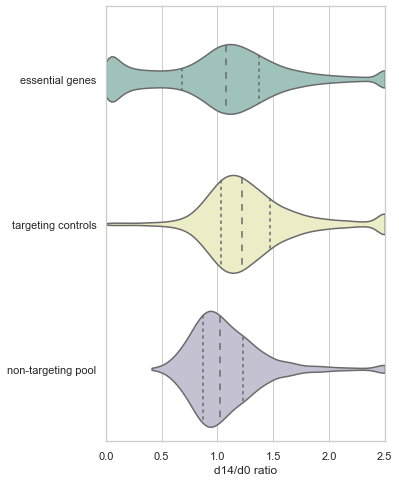

In [22]:
#overall plot, violin
#chop high ratio
df_essential_chopped = df_essential
df_essential_chopped.loc[df_essential_chopped['raw ratio']>2.5,'raw ratio']=2.5
df_tc_chopped = df_tc
df_tc_chopped.loc[df_tc_chopped['raw ratio']>2.5,'raw ratio']=2.5
df_nt_chopped = df_nt
df_nt_chopped.loc[df_nt_chopped['raw ratio']>2.5,'raw ratio']=2.5

plt.figure(figsize=(5,8))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(data = [df_essential_chopped['raw ratio'].values,
                       df_tc_chopped['raw ratio'].values,
                       df_nt_chopped['raw ratio'].values],
                       orient='h',cut=0,inner='quartile',
                   saturation=0.5, palette="Set3")

ax.set_yticklabels(['essential genes','targeting controls','non-targeting pool'])
ax.set_xlim(0,2.5)
ax.set_xlabel('d14/d0 ratio')
plt.savefig('../a_figures/ratio_percentile_violin.svg', format="svg", bbox_inches='tight')

## BLAST filtering essential off targets

In [5]:
#off target based on blast, essential genes

# read the essential gene list in K562
ess_df = pd.read_csv('../data/off-target-info/essential_gene_list_K562.csv')
ess_list = ess_df['gene name'].values
len(ess_list)

982

In [ ]:
blast_result = '../data/off-target-info/essential_genes_blast_first_24_3mis_e1.csv'
guide_dic_all = {}
with open(blast_result,'r') as infile1:   
    reader = csv.reader(infile1)
    #skip header
    next(reader, None)
    #['guide','gene', 'gene_id', 'pos', 'raw ratio','blast_f24_mis3_e1_20_match_num','blast_gene_list_f24_mis3_e1_20'] 
    off_guide =0
    for rows in reader:
        off_essen = 0
        off_essen_list = []
        #guide_dic_all[rows[0]]=rows[:-1]
        gene_name = rows[1]
        #HSPE1 and Hsp10
        if gene_name == 'Hsp10':
            gene_name = 'HSPE1'
        blast_list = rows[-1]
        for i in blast_list:
            if (i in ess_list) and (i != gene_name):
                off_essen = off_essen +1
                off_essen_list.append(i)
        #guide_dic_all[rows[0]]=guide_dic_all[rows[0]]+[off_essen]+ [off_essen_list]
        if off_essen > 0:
            off_guide = off_guide+1
        else: # no essential off targets
            guide_dic_all[rows[0]]=rows[:-2]
print(off_guide)

with open('../data/essential_genes_offtarget_filtered_f24_mismatch3.csv','w') as outf:
    writer = csv.writer(outf)
    writer.writerow(['guide','gene', 'gene_id', 'pos', 'raw ratio'])
    for info in guide_dic_all.keys():
        writer.writerow(guide_dic_all[info])

## analysis after blast filtering

In [3]:
#essential genes, pooled ratio analysis
df_essential = pd.read_csv('../data/integrated_guide_feature_filtered_f24_mismatch3_all_flanks.csv')
print(len(df_essential))
good_p_all1 = stats.percentileofscore(df_essential['raw ratio'], 0.41) #lowest ratio in nt guides
print('pct of lowest ratio in nt: '+str(good_p_all1))
good_p_all2 = stats.percentileofscore(df_essential['raw ratio'], 0.45)
print('pct of 0.45 ratio: '+str(good_p_all2))
good_p_all3 = stats.percentileofscore(df_essential['raw ratio'], 0.61) #2% nt
print("pct of 2% nt's ratio : "+str(good_p_all3))
good_p_all4 = stats.percentileofscore(df_essential['raw ratio'], 0.75) #10% nt
print("pct of 10% nt's ratio : "+str(good_p_all4))
bad_p1 = stats.percentileofscore(df_essential['raw ratio'], 2)
print('pct of 2 ratio: '+str(bad_p1))
bad_p2 = stats.percentileofscore(df_essential['raw ratio'], 2.5)
print('pct of 2.5 ratio: '+str(bad_p2))
pct_g = np.percentile(df_essential['raw ratio'],[10,20,80,90,95])
print('10th, 20th, 80th, 90th, 95th percentile ratio:')
print(pct_g)

#individual gene's ratio
gene_ratio = {}
for g in genes:
    df_g = df_essential[df_essential['gene']==g]
    pct_g = np.percentile(df_g['raw ratio'],[5,10,20,50,80,90,95])    
    good_p1 = stats.percentileofscore(df_g['raw ratio'], 0.45)
    good_p2 = stats.percentileofscore(df_g['raw ratio'], 0.48)
    good_p3 = stats.percentileofscore(df_g['raw ratio'], 0.61)
    good_p4 = stats.percentileofscore(df_g['raw ratio'], 0.75)
    bad_p1 = stats.percentileofscore(df_g['raw ratio'], 2) # 2 ratio
    bad_p2 = stats.percentileofscore(df_g['raw ratio'], 2.5) #2.5ratio
    gene_ratio[g]= list(pct_g)+[good_p1,good_p2,good_p3,good_p4,bad_p1,bad_p2]
    
output_file = '../data/survival screen qc/ratio_by_gene_filtered_f24.csv'
with open(output_file,'w') as csvfile:
    mywriter = csv.writer(csvfile)
    mywriter.writerow(['gene','5pct','10pct','20pct','50pct','80pct','90pct','95pct',
                     '0.45ratio_pct','0.48ratio_pct','0.61ratio_pct','0.75ratio_pct','2ratio_pct','2.5ratio_pct'])
    for gene in gene_ratio.keys():
        mywriter.writerow([gene] + gene_ratio[gene]) 

120279
pct of lowest ratio in nt: 18.364386135568136
pct of 0.45 ratio: 19.33088901637027
pct of 2% nt's ratio : 23.03145187439204
pct of 10% nt's ratio : 27.189284912578255
pct of 2 ratio: 93.65475269997256
pct of 2.5 ratio: 96.8768446694768
10th, 20th, 80th, 90th, 95th percentile ratio:
[0.12 0.48 1.45 1.75 2.15]


In [4]:
#targeting controls and nt guides, filtered
control_genes = ['CTCFL', 'SAGE1', 'TLX1', 'DTX2', 'OR2C3']
df_tc_nt_filter = pd.read_csv('../data/d14_plasmid_library_nt_control_filtered_essential_e1_f24_3mis.csv')

df_tc = df_tc_nt_filter[df_tc_nt_filter['gene'].isin(control_genes)]
print(len(df_tc))
df_nt = df_tc_nt_filter[~df_tc_nt_filter['gene'].isin(control_genes)]
print(len(df_nt))

#individual control gene's ratio
gene_ratio = {}
for g in control_genes:
    df_g = df_tc[df_tc['gene']==g]
    pct_g = np.percentile(df_g['raw ratio'],[5,10,20,50,80,90,95])    
    good_p1 = stats.percentileofscore(df_g['raw ratio'], 0.45)
    good_p2 = stats.percentileofscore(df_g['raw ratio'], 0.48)
    good_p3 = stats.percentileofscore(df_g['raw ratio'], 0.61)
    good_p4 = stats.percentileofscore(df_g['raw ratio'], 0.75)
    bad_p1 = stats.percentileofscore(df_g['raw ratio'], 2) # 2 ratio
    bad_p2 = stats.percentileofscore(df_g['raw ratio'], 2.5) # 2.5ratio
    gene_ratio[g]= list(pct_g)+[good_p1,good_p2,good_p3,good_p4,bad_p1,bad_p2]
    
output_file = '../data/survival screen qc/ratio_by_gene_controls_filtered.csv'
with open(output_file,'w') as csvfile:
    mywriter = csv.writer(csvfile)
    mywriter.writerow(['gene','5pct','10pct','20pct','50pct','80pct','90pct','95pct',
                     '0.45ratio_pct','0.48ratio_pct','0.61ratio_pct','0.75ratio_pct','2ratio_pct','2.5ratio_pct'])
    for gene in gene_ratio.keys():
        mywriter.writerow([gene] + gene_ratio[gene])  

13878
3562


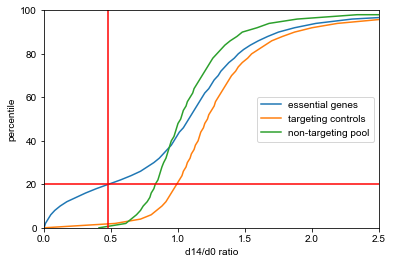

In [20]:
#overall plot
plt.clf()
p = np.linspace(0, 100, 51)
plt.figsize=(20,30)
ax = plt.gca()

#essential genes, pooled
ax.plot(np.percentile(df_essential['raw ratio'], p),p, label = 'essential genes')
#ax.plot(np.percentile(df['raw ratio'], p),p, label = 'essential genes')

#targeting controls,pooled
ax.plot(np.percentile(df_tc['raw ratio'], p),p, label = 'targeting controls')

#nt guides
ax.plot(np.percentile(df_nt['raw ratio'], p),p, label = 'non-targeting pool')

ax.set(
    xlabel='d14/d0 ratio',
    ylabel='percentile')
ax.legend(bbox_to_anchor=(1.4, 0.8))
#plt.vlines(x=0.75)
ax.axvline(x=0.48,c='red')
ax.axhline(y=20,c='red')
ax.legend()
#plt.xscale('log')
#plt.grid(True)
plt.xlim(0,2.5)
plt.ylim(0,100)
#plt.show()
plt.savefig('../a_figures/ratio_percentile_filtered.svg', format="svg", bbox_inches='tight')

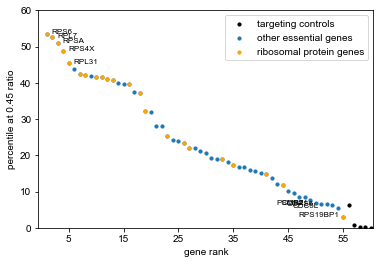

In [5]:
# individual gene plot
df_ess = pd.read_csv('../data/survival screen qc/ratio_by_gene_filtered_f24.csv')
df_ess = df_ess.sort_values(by=['0.48ratio_pct'])
df_c = pd.read_csv('../data/survival screen qc/ratio_by_gene_controls_filtered.csv')
df_c = df_c.sort_values(by=['0.48ratio_pct'])

plt.clf()
plt.rcParams['svg.fonttype'] = 'none'
# change font
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

plt.figsize=(20,30)
ax = plt.gca()

df_c.plot(x='gene', y='0.48ratio_pct', kind='scatter',ax=ax,label='targeting controls',c='black',s=10)
df_ess.plot(x='gene', y='0.48ratio_pct', kind='scatter',ax=ax,label='other essential genes',s=10)
for k, v in df_ess.head(5)[['gene','0.48ratio_pct']].iterrows():
    ax.annotate(v['gene'], v, xytext=(-45,0), textcoords='offset points',fontsize=8)
#df_ess.tail(5)[['gene','0.45ratio_pct','gene']].apply(lambda row: ax.text(*row),axis=1)
for k, v in df_ess.tail(5)[['gene','0.48ratio_pct']].iterrows():
    ax.annotate(v['gene'], v, xytext=(5,0), textcoords='offset points',fontsize=8)
df_ribo = df_ess[df_ess['gene'].str.startswith('RP')]
df_ribo.plot(x='gene', y='0.48ratio_pct', kind='scatter',ax=ax,label='ribosomal protein genes',c='orange',s=10)

plt.ylim(0,60)
plt.xlim(-0.5,60.5)
plt.ylabel('percentile at 0.45 ratio')
plt.xlabel('gene rank')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xticks([5,15,25,35,45,55])
ax.set_xticklabels([55,45,35,25,15,5])
ax.invert_xaxis()
#plt.title('distribution of genes percentile at 0.48 ratio')
plt.savefig("../a_figures/gene_0.48 ratio percentile.svg")

max(essential-targeting control)23.422635793023474
ratio at max(essential-targeting control)0.89
max(essential-nt)20.93371284400863
ratio at max(essential-nt)0.6


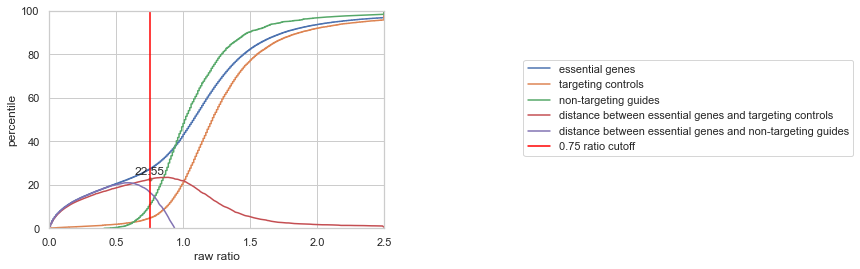

In [25]:
#add distance between essential genes and others
p = np.linspace(0, 100, 6001)
plt.figsize=(20,30)
ax = plt.gca()

#essential genes, pooled
ax.plot(np.percentile(df_essential['raw ratio'], p),p, label = 'essential genes')
    
#targeting controls,pooled
ax.plot(np.percentile(df_tc['raw ratio'], p),p, label = 'targeting controls')
#targeting controls,individual

#nt guides
ax.plot(np.percentile(df_nt['raw ratio'], p),p, label = 'non-targeting guides')

#calculate distance
d_e_control =[]
d_e_nt =[]
for r in np.linspace(0, 2.5, 251):
    d_e_control.append(stats.percentileofscore(df_essential['raw ratio'], r) - stats.percentileofscore(df_tc['raw ratio'],r))
    d_e_nt.append(stats.percentileofscore(df_essential['raw ratio'], r) - stats.percentileofscore(df_nt['raw ratio'],r))
    
ax.plot(np.linspace(0, 2.5, 251),d_e_control, label = 
        'distance between essential genes and targeting controls')
ax.plot(np.linspace(0, 2.5, 251),d_e_nt,label = 
        'distance between essential genes and non-targeting guides')


# max distance
print('max(essential-targeting control)'+str(max(d_e_control)))
maxpos_c = d_e_control.index(max(d_e_control))
print('ratio at max(essential-targeting control)'+str(np.linspace(0, 2.5, 251)[maxpos_c]))
print('max(essential-nt)'+str(max(d_e_nt)))
maxpos_nt = d_e_nt.index(max(d_e_nt))
print('ratio at max(essential-nt)'+str(np.linspace(0, 2.5, 251)[maxpos_nt]))
#0.75 ratio distance
de_control_075 = stats.percentileofscore(df_essential['raw ratio'], 0.75)-stats.percentileofscore(df_tc['raw ratio'],0.75)
plt.plot(0.75,de_control_075,marker='.')
plt.annotate(22.55,(0.75,de_control_075),
                     textcoords="offset points", # how to position the text
                     xytext=(0,5), # distance from text to points
                     ha='center')
ax.axvline(x=0.75,label='0.75 ratio cutoff',c='red')
ax.set(
    xlabel='raw ratio',
    ylabel='percentile')
ax.legend(bbox_to_anchor=(1.4, 0.8))
#plt.xscale('log')
plt.grid(True)
plt.xlim(0,2.5)
plt.ylim(0,100)
#plt.show()
plt.savefig('../a_figures/ratio_percentile_with_distance.svg', format="svg", bbox_inches='tight')

No handles with labels found to put in legend.


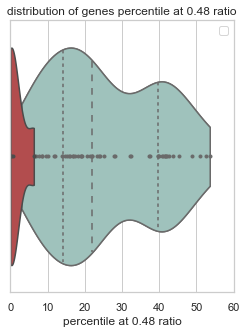

In [29]:
import seaborn as sns
plt.figure(figsize=(4,5))
sns.set_theme(style="whitegrid")

df_by_gene = pd.read_csv('../data/survival screen qc/ratio_by_gene_filtered_f24.csv')

sns.violinplot(x=df_by_gene['0.48ratio_pct'],inner="quartile", cut=0,scale="width", palette="Set3",saturation=0.5)
sns.violinplot(x=df_by_gene['0.48ratio_pct'],inner="point", cut=0,scale="width", palette="Set3",saturation=0.5)

#individual control genes
df_control_bygene = pd.read_csv('../data/survival screen qc/ratio_by_gene_controls_filtered.csv')
sns.violinplot(x=df_control_bygene['0.48ratio_pct'],inner="point", cut=0, scale="width", palette="Set1",saturation=0.5,alpha=0.4,label = 'control genes')
plt.xlim(0,60)
plt.legend()
#df_by_gene['0.75ratio_pct'].plot.hist(bins=20, alpha=0.5)
plt.xlabel('percentile at 0.48 ratio')
plt.title('distribution of genes percentile at 0.48 ratio')
#plt.show()
plt.savefig("../a_figures/gene_0.48 ratio percentile.pdf")

No handles with labels found to put in legend.


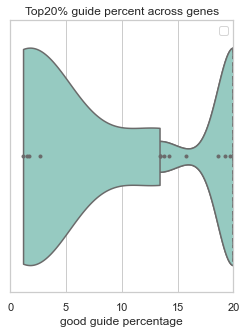

In [60]:
#good guide percent
import seaborn as sns
plt.figure(figsize=(4,5))
sns.set_theme(style="whitegrid")

df_by_gene = pd.read_csv('ratio_by_gene_filtered_f24.csv')
df_by_gene.loc[df_by_gene['0.75ratio_pct']>20,'0.75ratio_pct']=20
#df_by_gene.loc[df_by_gene['0.75ratio_pct']<=20,'good guide pct']=df_by_gene['0.75ratio_pct']
#df_by_gene['good guide pct'] = max(20,df_by_gene['0.75ratio_pct'])
#plt.violinplot(dataset =df_by_gene['0.75ratio_pct'])
#df_by_gene['0.75ratio_pct'].plot.box()
#plt.ylim(0,21)
#sns.violinplot(y=df_by_gene['0.75ratio_pct'],inner="quartile",orient='v',palette="Set3",saturation=0.7)
#sns.violinplot(y=df_by_gene['0.75ratio_pct'],inner="point",orient='v',palette="Set3",saturation=0.7)

sns.violinplot(x=df_by_gene['0.75ratio_pct'],inner="quartile", cut=0, scale="width", palette="Set3")
sns.violinplot(x=df_by_gene['0.75ratio_pct'],inner="point", cut=0, scale="width", palette="Set3")

#individual control genes
df_control_bygene = pd.read_csv('ratio_by_gene_controls.csv')
df_control_bygene['0.75ratio_pct'].plot.hist(bins=40, alpha=0.5,ax=ax1)
sns.violinplot(x=df_control_bygene['0.75ratio_pct'],inner="point", cut=0, scale="width", palette="Set3",alpha = 0.5,label = 'control genes')
plt.xlim(0,20)
plt.legend()
#df_by_gene['0.75ratio_pct'].plot.hist(bins=20, alpha=0.5)
plt.xlabel('good guide percentage')
plt.title('Top20% guide percent across genes')
#plt.show()
plt.savefig("a_figures/gene_goodguide_percent.svg",format="svg")

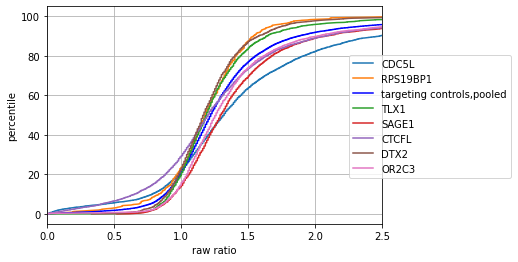

In [9]:
#plot bottom genes
bottom_genes = ['CDC5L','RPS19BP1']
p = np.linspace(0, 100, 6001)
plt.figsize=(25,35)
ax = plt.gca()

for g in bottom_genes:
    df_g = df_all_iso[df_all_iso['gene']==g]
    ax.plot(np.percentile(df_g['raw ratio'], p),p, label = g)
    
#targeting controls,pooled
ax.plot(np.percentile(df_tc['raw ratio'], p),p, label = 'targeting controls,pooled', c='blue')
#targeting controls,individual
for g in tc_genes:
    df_g = df_tc[df_tc['gene']==g]
    ax.plot(np.percentile(df_g['raw ratio'], p),p, label = g)

#nt guides
#ax.plot(np.percentile(df_nt['raw ratio'], p),p, label = 'non-targeting guides', c='black')

ax.set(
    xlabel='raw ratio',
    ylabel='percentile')
ax.legend(bbox_to_anchor=(1.4, 0.8))
#plt.xscale('log')
plt.grid(True)
plt.xlim(0,2.5)
plt.show()

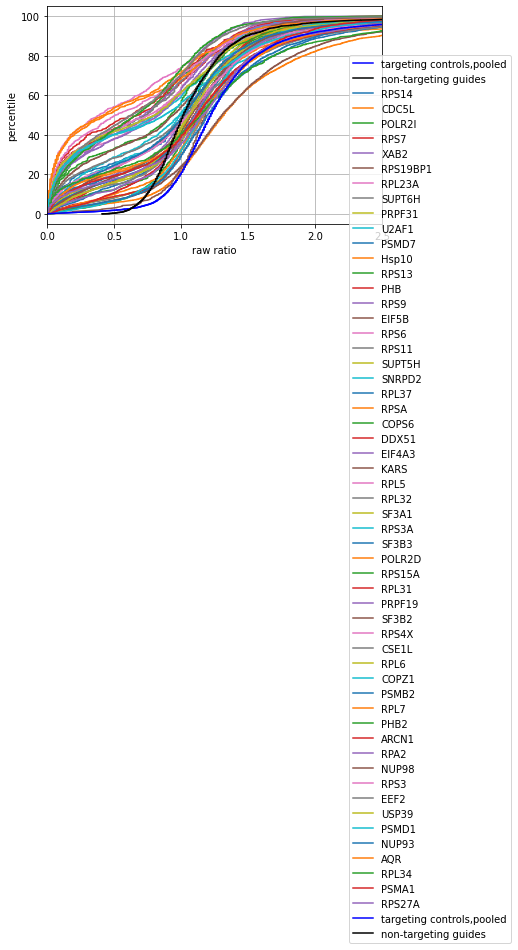

In [16]:
# plot all genes
p = np.linspace(0, 100, 6001)
plt.figsize=(25,35)
ax = plt.gca()

#targeting controls,pooled
ax.plot(np.percentile(df_tc['raw ratio'], p),p, label = 'targeting controls,pooled', c='blue')
#targeting controls,individual

#nt guides
ax.plot(np.percentile(df_nt['raw ratio'], p),p, label = 'non-targeting guides', c='black')

for g in genes:
    df_g = df_all_iso[df_all_iso['gene']==g]
    ax.plot(np.percentile(df_g['raw ratio'], p),p, label = g)
    
#targeting controls,pooled
ax.plot(np.percentile(df_tc['raw ratio'], p),p, label = 'targeting controls,pooled', c='blue')
#targeting controls,individual

#nt guides
ax.plot(np.percentile(df_nt['raw ratio'], p),p, label = 'non-targeting guides', c='black')

ax.set(
    xlabel='raw ratio',
    ylabel='percentile')
ax.legend(bbox_to_anchor=(1.4, 0.8))
#plt.xscale('log')
plt.grid(True)
plt.xlim(0,2.5)
plt.show()

In [37]:
# alternative method
input_file = 'd14_plasmid_library_ratio_targeting_library.csv'
gene_dictionary = {}

with open(input_file, mode ='r') as infile:   
    reader = csv.reader(infile)
    #skip header
    #next(reader, None)
    for row in reader:
        if row[1] not in gene_dictionary.keys():
            gene_dictionary[row[1]]=[float(row[4])] #dicitonary with gene and guide raw ratio
        else:
            gene_dictionary[row[1]].append(float(row[4]))

In [39]:
gene_sum_dic = {}
for g in gene_dictionary.keys():
    gene_dictionary[g].sort()
    pct_g = np.percentile(gene_dictionary[g],[0,2.5 ,5,10,20, 50, 70, 90,95,100])
    good_index = np.argmin(np.abs(np.array(gene_dictionary[g])-0.45)) # 0.45 ratio
    good_p = good_index/len(gene_dictionary[g]) # percentile of 0.45 ratio
    bad_index1 = np.argmin(np.abs(np.array(gene_dictionary[g])-2)) # 2 ratio
    bad_p1 = bad_index1/len(gene_dictionary[g])
    bad_index2 = np.argmin(np.abs(np.array(gene_dictionary[g])-2.5)) # 2.5 ratio
    bad_p2 = bad_index2/len(gene_dictionary[g])
    gene_sum = list(pct_g)+[good_p,bad_p1,bad_p2]
    gene_sum_dic[g]= gene_sum
    #print(gene_sum)

output_file = 'ratio_by_gene.csv'
with open(output_file,'w') as csvfile:
    mywriter = csv.writer(csvfile)
    mywriter.writerow(['gene','min','2.5pct','5pct','10pct','20pct','50pct','70pct','90pct','95pct','max',
                     '0.45ratio_pct','2ratio_pct','2.5ratio_pct'])
    for gene in gene_sum_dic.keys():
        mywriter.writerow([gene] + gene_sum_dic[gene])

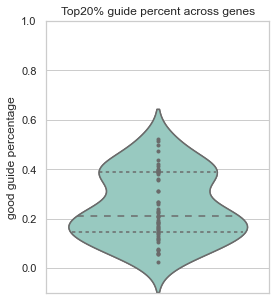

In [38]:
import seaborn as sns
plt.figure(figsize=(4,5))
sns.set_theme(style="whitegrid")
sns.violinplot(y=df['0.45ratio_pct'],inner="quartile",orient='v',palette="Set3",saturation=0.7)
sns.violinplot(y=df['0.45ratio_pct'],inner="point",orient='v',palette="Set3",saturation=0.7)
plt.ylabel('good guide percentage')
plt.ylim(-0.1,1)
plt.title('Top20% guide percent across genes')
#plt.show()
plt.savefig("gene_goodguide_percent.svg",format="svg")

In [44]:
# make new filtered dataset with ratio and percentile
guide_info = {}
with open('integrated_guide_feature_filtered_ver3.csv','r') as inf:
    reader = csv.reader(inf)
    #skip header
    next(reader, None)
    for rows in reader:
        guide_info[rows[0]]=rows

with open('ratio_percentile_bygene.csv','r') as inf2:
    reader = csv.reader(inf2)
    #skip header
    next(reader, None)
    for rows in reader:
        #print(rows)
        if rows[1] in guide_info.keys():
            guide_info[rows[1]]= guide_info[rows[1]]+ rows[4:]+[0,0]
            #define good guides
            if float(rows[5]) <= 0.45: # top 20% in all guides according to ratio
                guide_info[rows[1]][-2]=1 #good guide
            if float(rows[6]) <= 0.2: # top20% for each gene
                guide_info[rows[1]][-1]=1
                
                
with open('integrated_guide_feature_filtered_new_ver3.csv','w') as outf:
    writer = csv.writer(outf)
    writer.writerow(['guide','gene','refseq','chopped ratio','old relative_ratio','binary_relative_ratio','position','is_5UTR','UTR5_position','is_CDS','CDS_position','is_3UTR',
                     'UTR3_position','RNAseq2','RNAseq3','RNAseq7','RNAseq8','RNAseq2_relative','RNAseq3_relative','RNAseq7_relative','RNAseq8_relative','G_hp','C_hp','A_hp','T_hp',
                     'np_vivo_ic_has_data','np_vivo_ic_sum', 'pos','ratio','relative_ratio','0.45ratio_good','top 20 pct per gene'])
    for guides in guide_info.keys():
        writer.writerow(guide_info[guides])

print(len(guide_info))

119408


In [45]:
print(guide_info[rows[1]])

['ATAACCCAATATAACCATTTAATATATTCT', 'SF3A1', 'NM_005877.5', '2', '100', '1', '0.961097063', '0', '0', '0', '0', '1', '1.009659807', '0.030306098', '0.004198947', '0.001268415', '0.005323565', '0.104128404', '0.020702399', '0.0211113', '0.04977685', '0', '1', '0', '1', '0', '0', '4941', '6000.0', '1.0', 0, 0]


In [2]:
#make new filtered relative ratio and further filter guides with many off targets
df2 = pd.read_csv('integrated_guide_feature_filtered_new_ver3.csv')
df_blast = pd.read_csv('integrated_features.csv')
df_blast_info = df_blast[['guide','guide_specificity_e10_15','guide_specificity_e1_20']]
df_all = df2.merge(df_blast_info, left_on='guide', right_on='guide')

count    119408.000000
mean          1.589609
std           1.652717
min           0.000000
20%           1.000000
50%           1.000000
80%           2.000000
90%           3.000000
95%           4.000000
max          95.000000
Name: guide_specificity_e1_20, dtype: float64

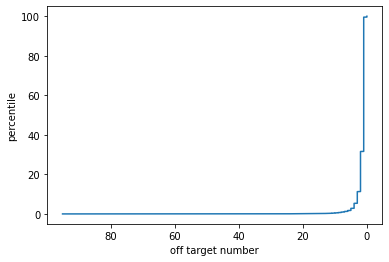

In [14]:
p = np.linspace(0, 100, 3001)
fig, ax = plt.subplots()
ax.plot(-np.percentile(-df_all['guide_specificity_e1_20'].values, p),p)
#plt.xlim(0,20)
plt.xlabel('off target number')
plt.ylabel('percentile')
ax.invert_xaxis()
#df_all['guide_specificity_e1_20'].plot(kind='hist',figsize=(5,5),bins=np.linspace(0, 100, 200),alpha=0.4,xlim=(0,100),xticks=np.arange(0, 100, step=5))
df_all['guide_specificity_e1_20'].describe(percentiles=[0.2, 0.5,0.8,0.9,0.95])

In [15]:
df_all_filter = df_all[df_all['guide_specificity_e1_20']<=4]

In [17]:
df_all_filter['relative_ratio'] = df_all_filter.groupby("gene")["ratio"].rank(pct=True)

<ipython-input-17-4a0d2a6febd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_filter['relative_ratio'] = df_all_filter.groupby("gene")["ratio"].rank(pct=True)


In [3]:
df_all

,guide,gene,refseq,chopped ratio,old relative_ratio,binary_relative_ratio,position,is_5UTR,UTR5_position,is_CDS,...,pos,ratio,relative_ratio,0.45ratio_good,top 20 pct per gene,UTR5_position_new,cds_pos_new,UTR3_position,guide_specificity_e10_15,guide_specificity_e1_20
0,ATAACCCAATATAACCATTTAATATATTCT,SF3A1,NM_005877.5,2.0,100.000000,1,0.961097,0,0.0,0,...,4941,6000.00,1.000000,0,0,0.0,0.000000,0.923195,16,1
1,ACAACAATAAAAAATTATAATAAAATTAAA,PSMB2,NM_002794.4,2.0,100.000000,1,0.866062,0,0.0,0,...,4106,5572.28,1.000000,0,0,0.0,0.000000,0.829439,80,18
2,AATAGTCACAAAAGAAACTGACAGTTATAA,CDC5L,NM_001253.3,2.0,100.000000,1,0.986629,0,0.0,0,...,6346,4360.33,1.000000,0,0,0.0,0.000000,0.976838,2,1
3,AAAACAACAATAAAAAATTATAATAAAATT,PSMB2,NM_002794.4,2.0,100.000000,1,0.866695,0,0.0,0,...,4109,4028.20,0.999787,0,0,0.0,0.000000,0.830244,68,11
4,AACTAAATCAATTTATATGAATTATATAAA,CDC5L,NM_001253.3,2.0,100.000000,1,0.547264,0,0.0,0,...,3520,2793.85,0.999844,0,0,0.0,0.000000,0.215729,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119403,GTGAATCTTCATCCTCATTACGTTTTCTGG,RPL31,NM_000993.4,0.0,1.680672,0,0.695652,0,0.0,1,...,352,0.00,0.016807,1,1,0.0,0.700265,0.000000,12,2
119404,TTCAAGTCATTTGTCTGCACCTCTCGGGTC,RPS3A,NM_001006.4,0.0,1.718404,0,0.638412,0,0.0,1,...,595,0.00,0.017184,1,1,0.0,0.647355,0.000000,3,1
119405,ATTTCAGAACTTCAGTGGAATGGGCAGCAT,Hsp10,NM_002157.2,0.0,1.464208,0,0.819328,0,0.0,0,...,780,0.00,0.014642,1,1,0.0,0.000000,0.152709,9,2
119406,GAGCCTGCATGCTTAGAGGTTGCAAACAGT,SF3B3,NM_012426.4,0.0,0.314855,0,0.213808,0,0.0,1,...,2078,0.00,0.003149,1,1,0.0,0.510813,0.000000,2,1


In [18]:
df_all_filter

,guide,gene,refseq,chopped ratio,old relative_ratio,binary_relative_ratio,position,is_5UTR,UTR5_position,is_CDS,...,pos,ratio,relative_ratio,0.45ratio_good,top 20 pct per gene,UTR5_position_new,cds_pos_new,UTR3_position,guide_specificity_e10_15,guide_specificity_e1_20
0,ATAACCCAATATAACCATTTAATATATTCT,SF3A1,NM_005877.5,2.0,100.000000,1,0.961097,0,0.0,0,...,4941,6000.00,1.000000,0,0,0.0,0.000000,0.923195,16,1
2,AATAGTCACAAAAGAAACTGACAGTTATAA,CDC5L,NM_001253.3,2.0,100.000000,1,0.986629,0,0.0,0,...,6346,4360.33,1.000000,0,0,0.0,0.000000,0.976838,2,1
4,AACTAAATCAATTTATATGAATTATATAAA,CDC5L,NM_001253.3,2.0,100.000000,1,0.547264,0,0.0,0,...,3520,2793.85,0.999825,0,0,0.0,0.000000,0.215729,11,1
5,ATATATATATATATATTCAGAATTAGGCAG,RPL23A,NM_000984.5,2.0,100.000000,1,0.522188,0,0.0,0,...,506,2776.11,1.000000,0,0,0.0,0.000000,0.023207,1,1
6,TCTAAATAAATAAATAAATCTAAAAAATTT,PSMB2,NM_002794.4,2.0,100.000000,1,0.406454,0,0.0,0,...,1927,2755.12,1.000000,0,0,0.0,0.000000,0.244158,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119403,GTGAATCTTCATCCTCATTACGTTTTCTGG,RPL31,NM_000993.4,0.0,1.680672,0,0.695652,0,0.0,1,...,352,0.00,0.016807,1,1,0.0,0.700265,0.000000,12,2
119404,TTCAAGTCATTTGTCTGCACCTCTCGGGTC,RPS3A,NM_001006.4,0.0,1.718404,0,0.638412,0,0.0,1,...,595,0.00,0.016366,1,1,0.0,0.647355,0.000000,3,1
119405,ATTTCAGAACTTCAGTGGAATGGGCAGCAT,Hsp10,NM_002157.2,0.0,1.464208,0,0.819328,0,0.0,0,...,780,0.00,0.013908,1,1,0.0,0.000000,0.152709,9,2
119406,GAGCCTGCATGCTTAGAGGTTGCAAACAGT,SF3B3,NM_012426.4,0.0,0.314855,0,0.213808,0,0.0,1,...,2078,0.00,0.002552,1,1,0.0,0.510813,0.000000,2,1
